# Question 2

In [1]:
#Downloading Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("roqayyeh/concrete-strength-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/concrete-strength-dataset


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/concrete-strength-dataset/ConcreteStrengthData.csv')
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


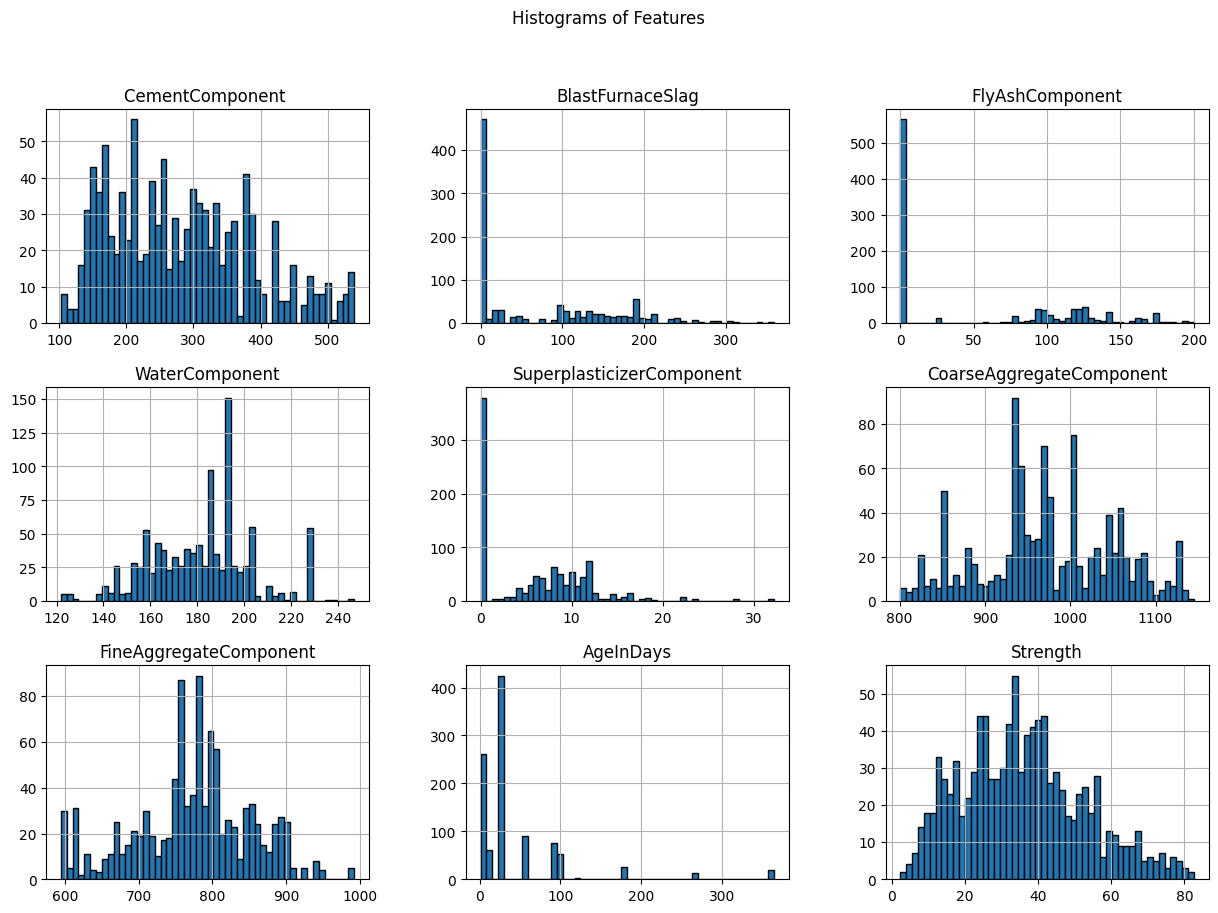

In [7]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10),bins=50 ,edgecolor='black')

plt.suptitle('Histograms of Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


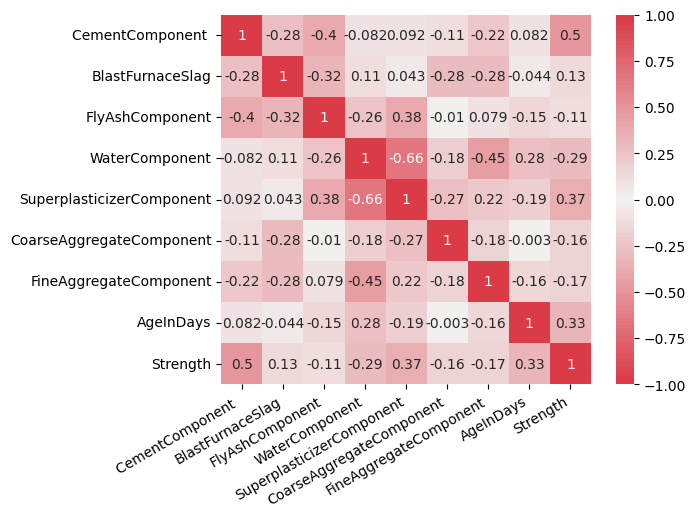

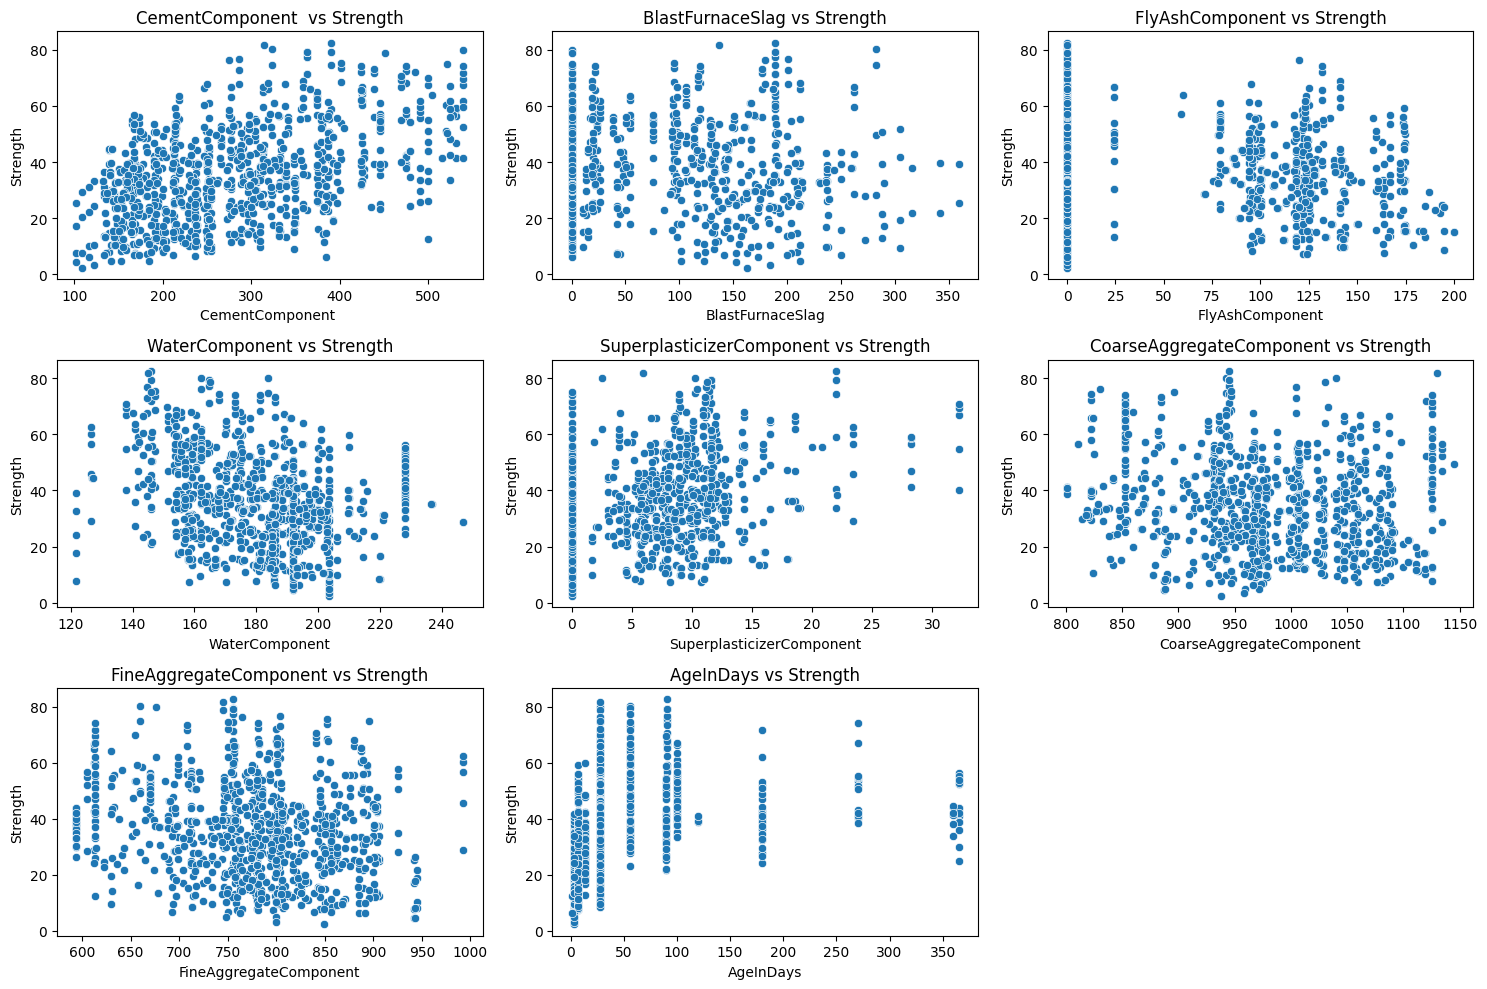

In [8]:

import seaborn as sns
# plotting correlation matrix
ax = sns.heatmap(
    df.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 10, n=100),
    square=True,
    annot=True
)

# Rotate x and y axis labels to 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

plt.show()

target_column = df.columns[-1]
features = df.columns[:-1]  # All columns except the last one

# Create scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on number of features
    sns.scatterplot(x=df[feature], y=df[target_column])
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.title(f'{feature} vs {target_column}')

plt.tight_layout()
plt.show()

## DataLoaders init

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

X = df.iloc[:, :-1].drop(columns=['FlyAshComponent','SuperplasticizerComponent']).values  # Features (all columns except target)
y = df.iloc[:, -1].values.reshape(-1, 1)  # Target column (reshaped to match PyTorch tensor shape)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert back to PyTorch tensors
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

## MLP with **16** neurons in Hidden Layer

In [10]:
# Define the model
class MLP_16N(nn.Module):
    def __init__(self):
        super(MLP_16N, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(6, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
mlp_16N = MLP_16N()
criterion = nn.MSELoss()  # MSE Loss for regression
optimizer = optim.Adam(mlp_16N.parameters(), lr=0.003)  # Adam optimizer

epochs = 50
train_losses_16N = []
test_mse_losses_16N = []
test_mae_losses_16N = []

for epoch in range(epochs):
    mlp_16N.train()  # Set model to training mode
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = mlp_16N(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_16N.append(train_loss)
    
    # Evaluation on the test set after each epoch
    mlp_16N.eval()  # Switch model to evaluation mode
    mse_losses = []
    mae_losses = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_16N(batch_X)
            mse_loss = nn.MSELoss()(predictions, batch_y).item()
            mae_loss = nn.L1Loss()(predictions, batch_y).item()  # L1 Loss = MAE
            mse_losses.append(mse_loss)
            mae_losses.append(mae_loss)
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_16N.append(avg_mse)
    test_mae_losses_16N.append(avg_mae)
    
    # Optionally print the metrics every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete!")

Epoch 5/50, Train Loss: 142.7984, Test MSE: 140.5018, Test MAE: 9.5861
Epoch 10/50, Train Loss: 143.2553, Test MSE: 145.5184, Test MAE: 9.8305
Epoch 15/50, Train Loss: 141.9433, Test MSE: 137.0133, Test MAE: 9.3379
Epoch 20/50, Train Loss: 136.7714, Test MSE: 131.0074, Test MAE: 9.3162
Epoch 25/50, Train Loss: 140.0031, Test MSE: 128.3009, Test MAE: 9.2232
Epoch 30/50, Train Loss: 134.3259, Test MSE: 138.0769, Test MAE: 9.2845
Epoch 35/50, Train Loss: 132.0440, Test MSE: 152.1862, Test MAE: 10.3740
Epoch 40/50, Train Loss: 124.5879, Test MSE: 129.5465, Test MAE: 9.4641
Epoch 45/50, Train Loss: 108.4976, Test MSE: 108.6030, Test MAE: 8.4636
Epoch 50/50, Train Loss: 89.9734, Test MSE: 94.9095, Test MAE: 7.9628
Training complete!


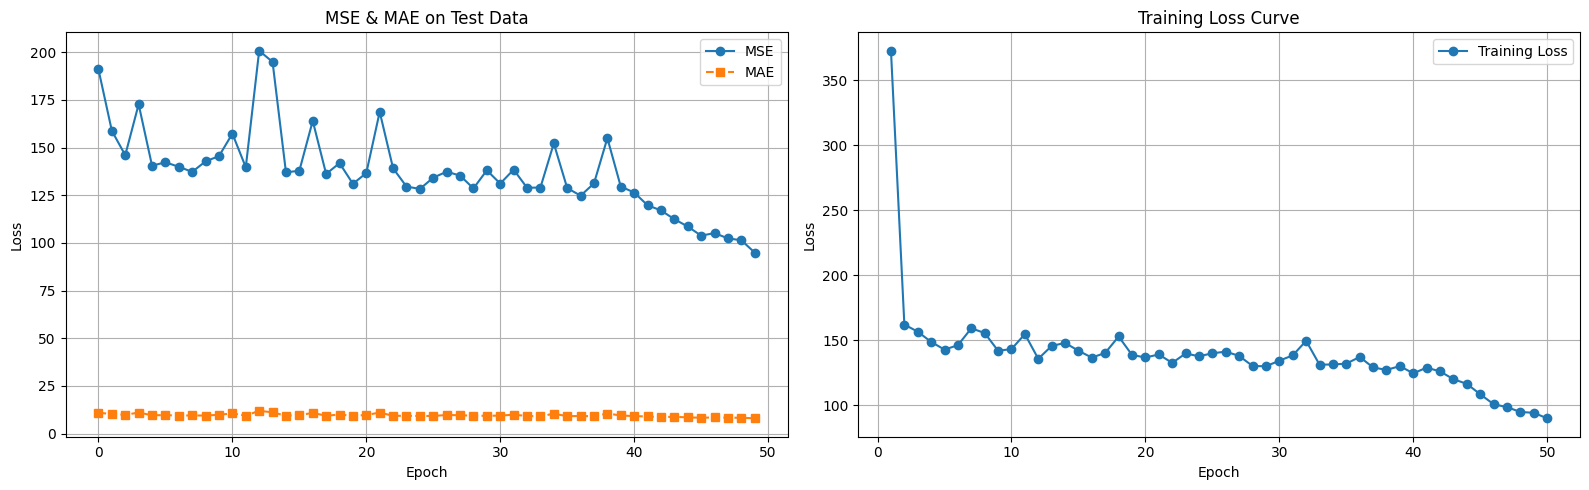

In [23]:
# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot MSE and MAE on the first subplot
ax1.plot(range(len(test_mse_losses_16N)), test_mse_losses_16N, label="MSE", marker="o", linestyle="-")
ax1.plot(range(len(test_mae_losses_16N)), test_mae_losses_16N, label="MAE", marker="s", linestyle="--")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("MSE & MAE on Test Data")
ax1.legend()
ax1.grid(True)

# Plot Training Loss Curve on the second subplot
ax2.plot(range(1, len(train_losses_16N) + 1), train_losses_16N, label="Training Loss", marker="o", linestyle="-")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_title("Training Loss Curve")
ax2.legend()
ax2.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## MLP with **32** neurons in Hidden Layer

In [12]:
# Define the model
class MLP_32N(nn.Module):
    def __init__(self):
        super(MLP_32N, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(6, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
mlp_32N = MLP_32N()
criterion = nn.MSELoss()  # MSE Loss for regression
optimizer = optim.Adam(mlp_32N.parameters(), lr=0.003)  # Adam optimizer

epochs = 50
train_losses_32N = []
test_mse_losses_32N = []
test_mae_losses_32N = []

for epoch in range(epochs):
    mlp_32N.train()  # Set model to training mode
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = mlp_32N(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_32N.append(train_loss)
    
    # Evaluation on test set after each epoch
    mlp_32N.eval()  # Set model to evaluation mode
    mse_losses = []
    mae_losses = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_32N(batch_X)
            mse_loss = nn.MSELoss()(predictions, batch_y).item()
            mae_loss = nn.L1Loss()(predictions, batch_y).item()  # L1 Loss = MAE
            mse_losses.append(mse_loss)
            mae_losses.append(mae_loss)
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_32N.append(avg_mse)
    test_mae_losses_32N.append(avg_mae)
    
    # Optionally print the metrics every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete!")

Epoch 5/50, Train Loss: 128.5297, Test MSE: 119.0732, Test MAE: 8.8472
Epoch 10/50, Train Loss: 103.4404, Test MSE: 114.6081, Test MAE: 8.7820
Epoch 15/50, Train Loss: 111.4962, Test MSE: 142.9538, Test MAE: 9.7464
Epoch 20/50, Train Loss: 90.0429, Test MSE: 83.8539, Test MAE: 7.5456
Epoch 25/50, Train Loss: 97.8331, Test MSE: 77.3217, Test MAE: 7.2176
Epoch 30/50, Train Loss: 80.5706, Test MSE: 72.9463, Test MAE: 7.0823
Epoch 35/50, Train Loss: 82.5370, Test MSE: 68.4982, Test MAE: 6.9156
Epoch 40/50, Train Loss: 72.4889, Test MSE: 73.5329, Test MAE: 6.7406
Epoch 45/50, Train Loss: 71.5920, Test MSE: 63.5032, Test MAE: 6.4001
Epoch 50/50, Train Loss: 69.2294, Test MSE: 60.0187, Test MAE: 6.3308
Training complete!


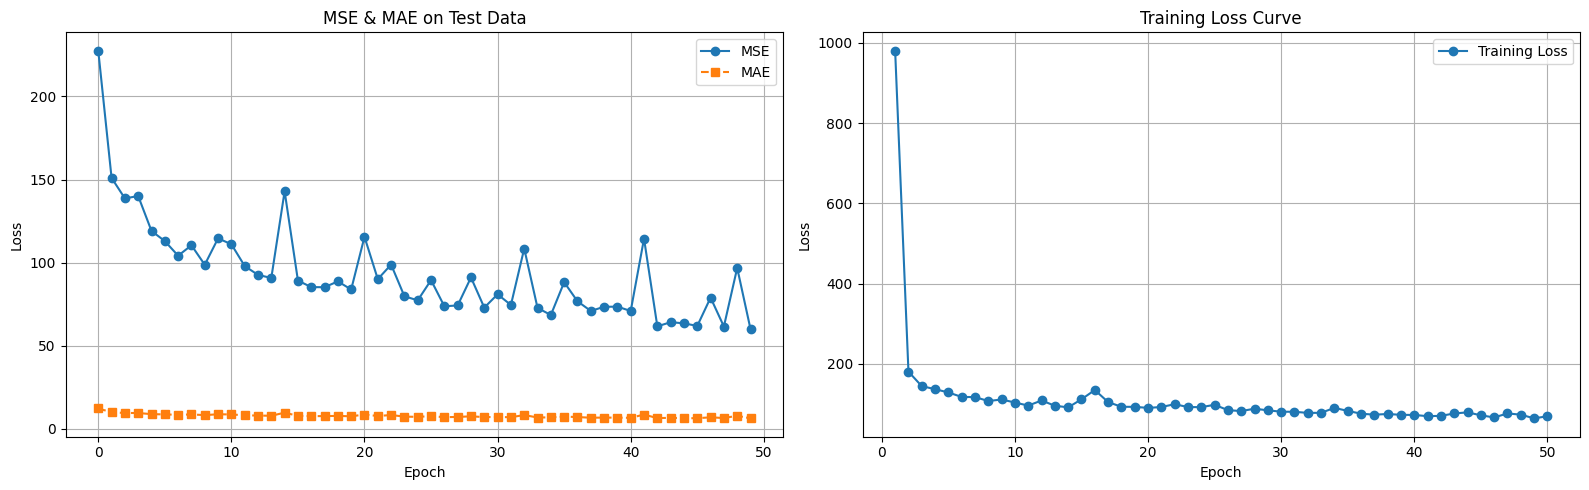

In [24]:
# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot MSE and MAE on the first subplot
ax1.plot(range(len(test_mse_losses_32N)), test_mse_losses_32N, label="MSE", marker="o", linestyle="-")
ax1.plot(range(len(test_mae_losses_32N)), test_mae_losses_32N, label="MAE", marker="s", linestyle="--")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("MSE & MAE on Test Data")
ax1.legend()
ax1.grid(True)

# Plot Training Loss Curve on the second subplot
ax2.plot(range(1, len(train_losses_32N) + 1), train_losses_32N, label="Training Loss", marker="o", linestyle="-")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_title("Training Loss Curve")
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## 32 Neurons vs 16 Neurons

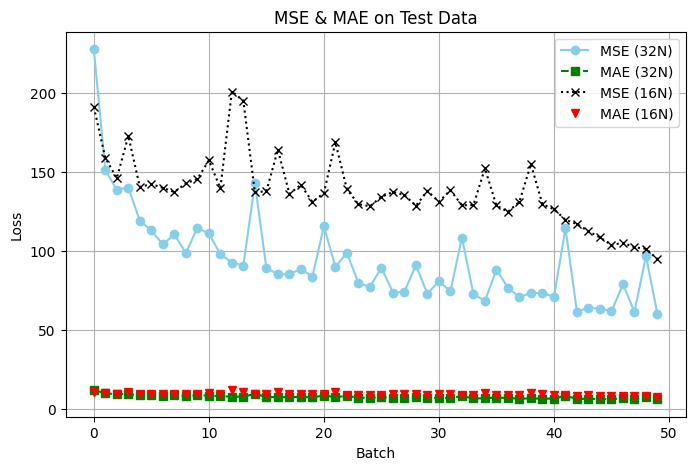

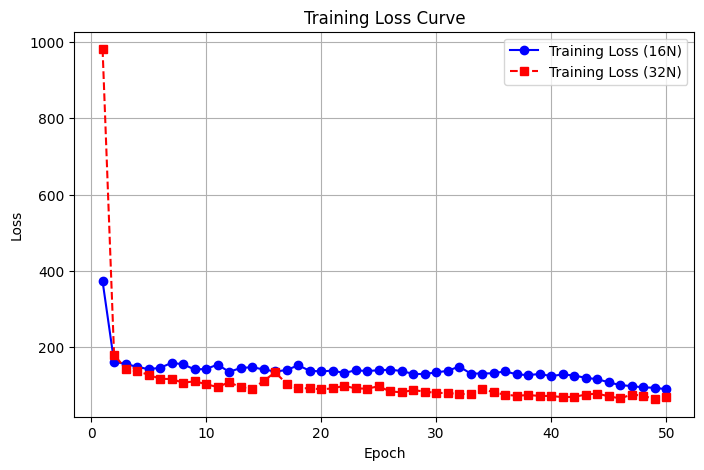

In [14]:
# Plot MSE and MAE
plt.figure(figsize=(8, 5))
plt.plot(range(len(test_mse_losses_32N)), test_mse_losses_32N, label="MSE (32N)", marker="o", linestyle="-", color="skyblue")
plt.plot(range(len(test_mae_losses_32N)), test_mae_losses_32N, label="MAE (32N)", marker="s", linestyle="--", color="green")
plt.plot(range(len(test_mse_losses_16N)), test_mse_losses_16N, label="MSE (16N)", marker="x", linestyle=":", color="black")
plt.plot(range(len(test_mae_losses_16N)), test_mae_losses_16N, label="MAE (16N)", marker="v", linestyle=" ", color="red")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.title("MSE & MAE on Test Data")
plt.legend()
plt.grid(True)
plt.show()

# Plot Training Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_losses_16N, label="Training Loss (16N)", marker="o", linestyle="-", color="blue")
plt.plot(range(1, epochs + 1), train_losses_32N, label="Training Loss (32N)", marker="s", linestyle="--", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

## Epochs effect (20 vs 50 vs 100)

In [15]:
# Initialize model, loss function, and optimizer for 20 epochs
mlp_20Ep = MLP_32N()
criterion = nn.MSELoss()  # MSE Loss for regression
optimizer = optim.Adam(mlp_20Ep.parameters(), lr=0.005)

epochs = 20
train_losses_20Ep = []
test_mse_losses_20Ep = []
test_mae_losses_20Ep = []

for epoch in range(epochs):
    mlp_20Ep.train()  # Set model to training mode
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = mlp_20Ep(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_20Ep.append(train_loss)
    
    # Evaluate on test set after the epoch
    mlp_20Ep.eval()  # Switch to evaluation mode
    mse_losses = []
    mae_losses = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_20Ep(batch_X)
            mse_loss = nn.MSELoss()(predictions, batch_y).item()
            mae_loss = nn.L1Loss()(predictions, batch_y).item()  # L1 Loss = MAE
            mse_losses.append(mse_loss)
            mae_losses.append(mae_loss)
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_20Ep.append(avg_mse)
    test_mae_losses_20Ep.append(avg_mae)
    
    if (epoch + 1) % 5 == 0:
        print(f'20Ep - Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete for 20 epochs!\n")



# Initialize model, loss function, and optimizer for 50 epochs
mlp_50Ep = MLP_32N()
criterion = nn.MSELoss()  # MSE Loss for regression
optimizer = optim.Adam(mlp_50Ep.parameters(), lr=0.005)

epochs = 50
train_losses_50Ep = []
test_mse_losses_50Ep = []
test_mae_losses_50Ep = []

for epoch in range(epochs):
    mlp_50Ep.train()  # Set model to training mode
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = mlp_50Ep(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_50Ep.append(train_loss)
    
    # Evaluate on test set after the epoch
    mlp_50Ep.eval()  # Switch to evaluation mode
    mse_losses = []
    mae_losses = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_50Ep(batch_X)
            mse_loss = nn.MSELoss()(predictions, batch_y).item()
            mae_loss = nn.L1Loss()(predictions, batch_y).item()  # L1 Loss = MAE
            mse_losses.append(mse_loss)
            mae_losses.append(mae_loss)
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_50Ep.append(avg_mse)
    test_mae_losses_50Ep.append(avg_mae)
    
    if (epoch + 1) % 5 == 0:
        print(f'50Ep - Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete for 50 epochs!\n")


# Initialize model, loss function, and optimizer for 100 epochs
mlp_100Ep = MLP_32N()
criterion = nn.MSELoss()  # MSE Loss for regression
optimizer = optim.Adam(mlp_100Ep.parameters(), lr=0.005)

epochs = 100
train_losses_100Ep = []
test_mse_losses_100Ep = []
test_mae_losses_100Ep = []

for epoch in range(epochs):
    mlp_100Ep.train()  # Set model to training mode
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = mlp_100Ep(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_100Ep.append(train_loss)
    
    # Evaluate on test set after the epoch
    mlp_100Ep.eval()  # Switch to evaluation mode
    mse_losses = []
    mae_losses = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_100Ep(batch_X)
            mse_loss = nn.MSELoss()(predictions, batch_y).item()
            mae_loss = nn.L1Loss()(predictions, batch_y).item()  # L1 Loss = MAE
            mse_losses.append(mse_loss)
            mae_losses.append(mae_loss)
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_100Ep.append(avg_mse)
    test_mae_losses_100Ep.append(avg_mae)
    
    if (epoch + 1) % 5 == 0:
        print(f'100Ep - Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete for 100 epochs!")

20Ep - Epoch 5/20, Train Loss: 136.4293, Test MSE: 110.3942, Test MAE: 8.6674
20Ep - Epoch 10/20, Train Loss: 80.0174, Test MSE: 80.8047, Test MAE: 7.6377
20Ep - Epoch 15/20, Train Loss: 77.5924, Test MSE: 73.5344, Test MAE: 7.1741
20Ep - Epoch 20/20, Train Loss: 78.6342, Test MSE: 129.2684, Test MAE: 9.5329
Training complete for 20 epochs!

50Ep - Epoch 5/50, Train Loss: 142.3260, Test MSE: 154.6983, Test MAE: 10.0967
50Ep - Epoch 10/50, Train Loss: 109.1759, Test MSE: 111.9752, Test MAE: 8.7538
50Ep - Epoch 15/50, Train Loss: 83.2691, Test MSE: 90.7728, Test MAE: 7.6949
50Ep - Epoch 20/50, Train Loss: 77.3970, Test MSE: 80.6056, Test MAE: 7.1962
50Ep - Epoch 25/50, Train Loss: 73.2192, Test MSE: 68.8880, Test MAE: 6.9205
50Ep - Epoch 30/50, Train Loss: 70.1874, Test MSE: 63.7480, Test MAE: 6.4550
50Ep - Epoch 35/50, Train Loss: 60.9584, Test MSE: 60.9677, Test MAE: 6.4367
50Ep - Epoch 40/50, Train Loss: 76.1235, Test MSE: 64.2375, Test MAE: 6.2870
50Ep - Epoch 45/50, Train Loss: 64.9

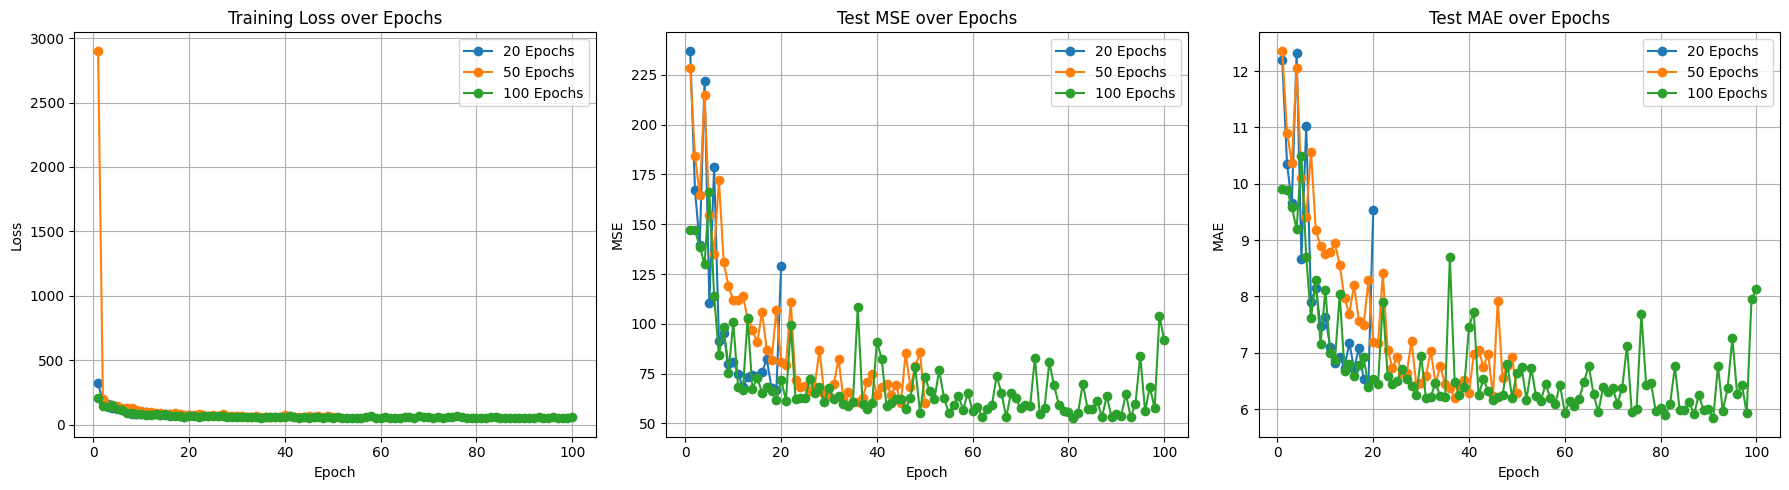

In [16]:
epochs_20 = list(range(1, 21))
epochs_50 = list(range(1, 51))
epochs_100 = list(range(1, 101))

plt.figure(figsize=(18, 5))

# Plot training loss
plt.subplot(1, 3, 1)
plt.plot(epochs_20, train_losses_20Ep, label='20 Epochs', marker='o')
plt.plot(epochs_50, train_losses_50Ep, label='50 Epochs', marker='o')
plt.plot(epochs_100, train_losses_100Ep, label='100 Epochs', marker='o')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Plot test MSE
plt.subplot(1, 3, 2)
plt.plot(epochs_20, test_mse_losses_20Ep, label='20 Epochs', marker='o')
plt.plot(epochs_50, test_mse_losses_50Ep, label='50 Epochs', marker='o')
plt.plot(epochs_100, test_mse_losses_100Ep, label='100 Epochs', marker='o')
plt.title("Test MSE over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

# Plot test MAE
plt.subplot(1, 3, 3)
plt.plot(epochs_20, test_mae_losses_20Ep, label='20 Epochs', marker='o')
plt.plot(epochs_50, test_mae_losses_50Ep, label='50 Epochs', marker='o')
plt.plot(epochs_100, test_mae_losses_100Ep, label='100 Epochs', marker='o')
plt.title("Test MAE over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## MSE vs Huber vs MAE

In [17]:
# Model with MSE Loss
mlp_mse = MLP_32N()
criterion_mse = nn.MSELoss()
optimizer_mse = optim.Adam(mlp_mse.parameters(), lr=0.005)

epochs = 100
train_losses_mse = []
test_mse_losses_mse = []
test_mae_losses_mse = []

for epoch in range(epochs):
    mlp_mse.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer_mse.zero_grad()
        predictions = mlp_mse(batch_X)
        loss = criterion_mse(predictions, batch_y)
        loss.backward()
        optimizer_mse.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_mse.append(train_loss)
    
    mlp_mse.eval()
    mse_losses = []
    mae_losses = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_mse(batch_X)
            mse_loss = nn.MSELoss()(predictions, batch_y).item()
            mae_loss = nn.L1Loss()(predictions, batch_y).item()
            mse_losses.append(mse_loss)
            mae_losses.append(mae_loss)
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_mse.append(avg_mse)
    test_mae_losses_mse.append(avg_mae)
    
    if (epoch + 1) % 5 == 0:
        print(f'MSE - Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete for MSE model!\n")

# Model with MAE Loss
mlp_mae = MLP_32N()
criterion_mae = nn.L1Loss()
optimizer_mae = optim.Adam(mlp_mae.parameters(), lr=0.005)

epochs = 100
train_losses_mae = []
test_mse_losses_mae = []
test_mae_losses_mae = []

for epoch in range(epochs):
    mlp_mae.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer_mae.zero_grad()
        predictions = mlp_mae(batch_X)
        loss = criterion_mae(predictions, batch_y)
        loss.backward()
        optimizer_mae.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_mae.append(train_loss)
    
    mlp_mae.eval()
    mse_losses = []
    mae_losses = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_mae(batch_X)
            mse_loss = nn.MSELoss()(predictions, batch_y).item()
            mae_loss = nn.L1Loss()(predictions, batch_y).item()
            mse_losses.append(mse_loss)
            mae_losses.append(mae_loss)
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_mae.append(avg_mse)
    test_mae_losses_mae.append(avg_mae)
    
    if (epoch + 1) % 5 == 0:
        print(f'MAE - Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete for MAE model!\n")

# Model with Huber Loss
mlp_huber = MLP_32N()
criterion_huber = nn.HuberLoss()
optimizer_huber = optim.Adam(mlp_huber.parameters(), lr=0.005)

epochs = 100
train_losses_huber = []
test_mse_losses_huber = []
test_mae_losses_huber = []

for epoch in range(epochs):
    mlp_huber.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer_huber.zero_grad()
        predictions = mlp_huber(batch_X)
        loss = criterion_huber(predictions, batch_y)
        loss.backward()
        optimizer_huber.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_huber.append(train_loss)
    
    mlp_huber.eval()
    mse_losses = []
    mae_losses = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_huber(batch_X)
            mse_loss = nn.MSELoss()(predictions, batch_y).item()
            mae_loss = nn.L1Loss()(predictions, batch_y).item()
            mse_losses.append(mse_loss)
            mae_losses.append(mae_loss)
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_huber.append(avg_mse)
    test_mae_losses_huber.append(avg_mae)
    
    if (epoch + 1) % 5 == 0:
        print(f'Huber - Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete for Huber model!")

MSE - Epoch 5/100, Train Loss: 160.0818, Test MSE: 150.6971, Test MAE: 9.9413
MSE - Epoch 10/100, Train Loss: 135.2760, Test MSE: 162.0534, Test MAE: 10.3253
MSE - Epoch 15/100, Train Loss: 112.7482, Test MSE: 121.6993, Test MAE: 8.8741
MSE - Epoch 20/100, Train Loss: 97.1858, Test MSE: 88.3403, Test MAE: 7.8235
MSE - Epoch 25/100, Train Loss: 77.0969, Test MSE: 78.2142, Test MAE: 7.1576
MSE - Epoch 30/100, Train Loss: 68.2126, Test MSE: 88.6133, Test MAE: 7.2960
MSE - Epoch 35/100, Train Loss: 67.0863, Test MSE: 65.2604, Test MAE: 6.6897
MSE - Epoch 40/100, Train Loss: 64.0134, Test MSE: 65.1706, Test MAE: 6.7643
MSE - Epoch 45/100, Train Loss: 62.7434, Test MSE: 74.1864, Test MAE: 6.6915
MSE - Epoch 50/100, Train Loss: 66.9801, Test MSE: 61.1125, Test MAE: 6.6107
MSE - Epoch 55/100, Train Loss: 68.1333, Test MSE: 62.3110, Test MAE: 6.3013
MSE - Epoch 60/100, Train Loss: 57.8843, Test MSE: 100.4521, Test MAE: 8.5821
MSE - Epoch 65/100, Train Loss: 61.8147, Test MSE: 62.1207, Test MAE:

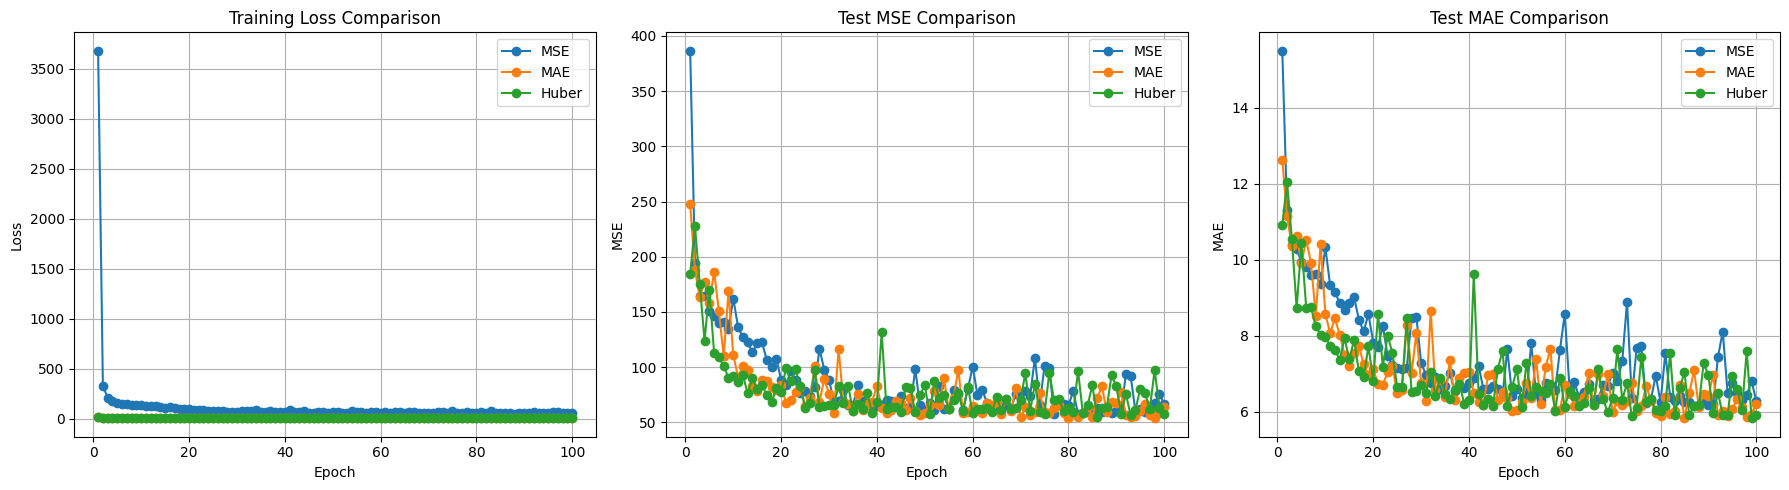

In [18]:
epochs_all = list(range(1, 101))

plt.figure(figsize=(18, 5))

# Plot training loss
plt.subplot(1, 3, 1)
plt.plot(epochs_all, train_losses_mse, label='MSE', marker='o')
plt.plot(epochs_all, train_losses_mae, label='MAE', marker='o')
plt.plot(epochs_all, train_losses_huber, label='Huber', marker='o')
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Plot test MSE
plt.subplot(1, 3, 2)
plt.plot(epochs_all, test_mse_losses_mse, label='MSE', marker='o')
plt.plot(epochs_all, test_mse_losses_mae, label='MAE', marker='o')
plt.plot(epochs_all, test_mse_losses_huber, label='Huber', marker='o')
plt.title("Test MSE Comparison")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

# Plot test MAE
plt.subplot(1, 3, 3)
plt.plot(epochs_all, test_mae_losses_mse, label='MSE', marker='o')
plt.plot(epochs_all, test_mae_losses_mae, label='MAE', marker='o')
plt.plot(epochs_all, test_mae_losses_huber, label='Huber', marker='o')
plt.title("Test MAE Comparison")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Adam vs SGD vs RMSProp

In [19]:
# Model 1: Adam Optimizer
mlp_adam = MLP_32N()
criterion = nn.MSELoss()
optimizer_adam = optim.Adam(mlp_adam.parameters(), lr=0.01)

epochs = 25
train_losses_adam = []
test_mse_losses_adam = []
test_mae_losses_adam = []

for epoch in range(epochs):
    mlp_adam.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer_adam.zero_grad()
        predictions = mlp_adam(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer_adam.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_adam.append(train_loss)
    
    mlp_adam.eval()
    mse_losses, mae_losses = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_adam(batch_X)
            mse_losses.append(nn.MSELoss()(predictions, batch_y).item())
            mae_losses.append(nn.L1Loss()(predictions, batch_y).item())
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_adam.append(avg_mse)
    test_mae_losses_adam.append(avg_mae)
    
    if (epoch + 1) % 5 == 0:
        print(f'Adam - Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete for Adam optimizer!\n")


# Model 2: SGD Optimizer
mlp_sgd = MLP_32N()
criterion = nn.MSELoss()
optimizer_sgd = optim.SGD(mlp_sgd.parameters(), lr=0.05)

train_losses_sgd = []
test_mse_losses_sgd = []
test_mae_losses_sgd = []

for epoch in range(epochs):
    mlp_sgd.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer_sgd.zero_grad()
        predictions = mlp_sgd(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer_sgd.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_sgd.append(train_loss)
    
    mlp_sgd.eval()
    mse_losses, mae_losses = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_sgd(batch_X)
            mse_losses.append(nn.MSELoss()(predictions, batch_y).item())
            mae_losses.append(nn.L1Loss()(predictions, batch_y).item())
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_sgd.append(avg_mse)
    test_mae_losses_sgd.append(avg_mae)
    
    if (epoch + 1) % 5 == 0:
        print(f'SGD - Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete for SGD optimizer!\n")


# Model 3: RMSProp Optimizer
mlp_rmsprop = MLP_32N()
criterion = nn.MSELoss()
optimizer_rmsprop = optim.RMSprop(mlp_rmsprop.parameters(), lr=0.01)

train_losses_rmsprop = []
test_mse_losses_rmsprop = []
test_mae_losses_rmsprop = []

for epoch in range(epochs):
    mlp_rmsprop.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer_rmsprop.zero_grad()
        predictions = mlp_rmsprop(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer_rmsprop.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses_rmsprop.append(train_loss)
    
    mlp_rmsprop.eval()
    mse_losses, mae_losses = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            predictions = mlp_rmsprop(batch_X)
            mse_losses.append(nn.MSELoss()(predictions, batch_y).item())
            mae_losses.append(nn.L1Loss()(predictions, batch_y).item())
    
    avg_mse = np.mean(mse_losses)
    avg_mae = np.mean(mae_losses)
    test_mse_losses_rmsprop.append(avg_mse)
    test_mae_losses_rmsprop.append(avg_mae)
    
    if (epoch + 1) % 5 == 0:
        print(f'RMSProp - Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test MSE: {avg_mse:.4f}, Test MAE: {avg_mae:.4f}')

print("Training complete for RMSProp optimizer!")

Adam - Epoch 5/25, Train Loss: 137.1201, Test MSE: 145.8494, Test MAE: 10.0747
Adam - Epoch 10/25, Train Loss: 107.1240, Test MSE: 107.1974, Test MAE: 8.4258
Adam - Epoch 15/25, Train Loss: 75.2796, Test MSE: 128.6903, Test MAE: 9.1120
Adam - Epoch 20/25, Train Loss: 81.0709, Test MSE: 91.5034, Test MAE: 7.5270
Adam - Epoch 25/25, Train Loss: 79.8412, Test MSE: 62.8961, Test MAE: 6.4080
Training complete for Adam optimizer!

SGD - Epoch 5/25, Train Loss: 283.8362, Test MSE: 257.9806, Test MAE: 13.0590
SGD - Epoch 10/25, Train Loss: 286.6919, Test MSE: 258.1025, Test MAE: 13.0647
SGD - Epoch 15/25, Train Loss: 286.1188, Test MSE: 257.9671, Test MAE: 13.0292
SGD - Epoch 20/25, Train Loss: 285.1604, Test MSE: 259.6964, Test MAE: 13.0489
SGD - Epoch 25/25, Train Loss: 286.4728, Test MSE: 258.4207, Test MAE: 13.0795
Training complete for SGD optimizer!

RMSProp - Epoch 5/25, Train Loss: 557.8547, Test MSE: 699.7944, Test MAE: 23.3355
RMSProp - Epoch 10/25, Train Loss: 292.2838, Test MSE: 31

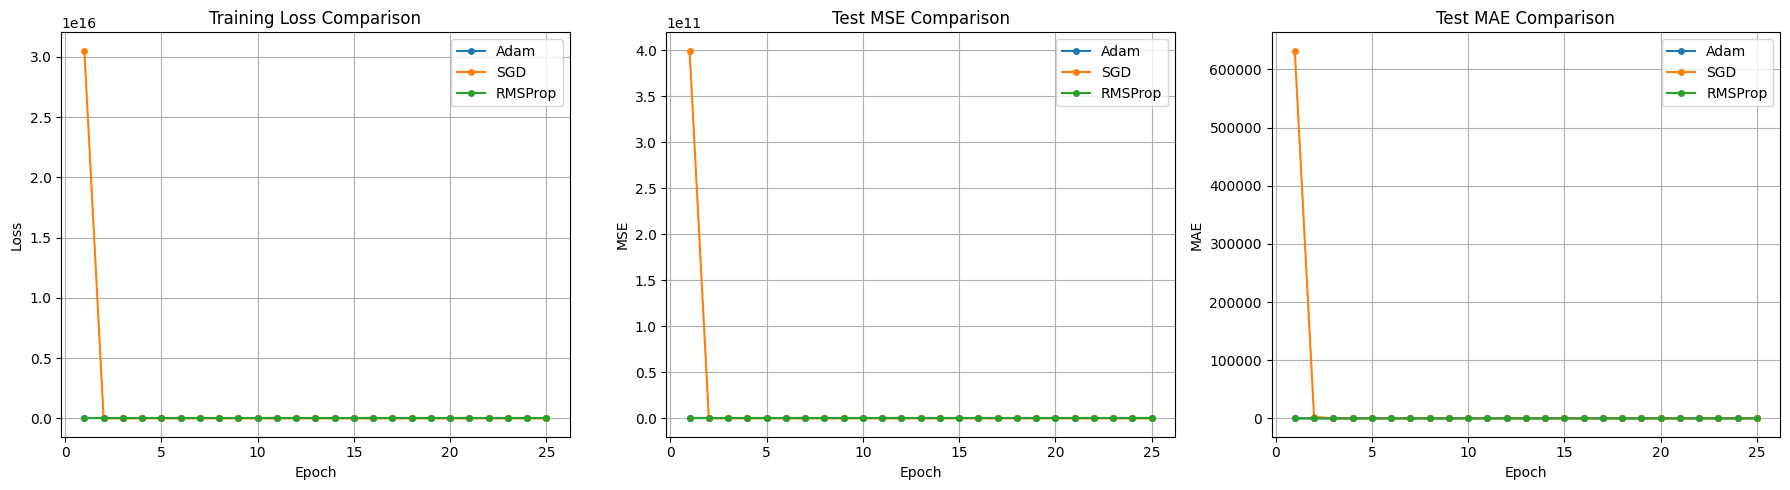

In [20]:
epochs = list(range(1, 26))  # All models use 25 epochs

plt.figure(figsize=(18, 5))

# Plot training loss comparison
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses_adam, label='Adam', marker='o', markersize=4)
plt.plot(epochs, train_losses_sgd, label='SGD', marker='o', markersize=4)
plt.plot(epochs, train_losses_rmsprop, label='RMSProp', marker='o', markersize=4)
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Plot test MSE comparison
plt.subplot(1, 3, 2)
plt.plot(epochs, test_mse_losses_adam, label='Adam', marker='o', markersize=4)
plt.plot(epochs, test_mse_losses_sgd, label='SGD', marker='o', markersize=4)
plt.plot(epochs, test_mse_losses_rmsprop, label='RMSProp', marker='o', markersize=4)
plt.title("Test MSE Comparison")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

# Plot test MAE comparison
plt.subplot(1, 3, 3)
plt.plot(epochs, test_mae_losses_adam, label='Adam', marker='o', markersize=4)
plt.plot(epochs, test_mae_losses_sgd, label='SGD', marker='o', markersize=4)
plt.plot(epochs, test_mae_losses_rmsprop, label='RMSProp', marker='o', markersize=4)
plt.title("Test MAE Comparison")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()